## Air Quality Index Predictor

#### Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

### 2.1 Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Import the CSV Data as Pandas DataFrame

In [5]:
df = pd.read_csv("Data\Real-Data\Real_Combine.csv")

#### Show Top 5 Records

In [6]:
df.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833


#### Shape of the dataset

In [7]:
df.shape

(1090, 9)

### 2.2 Dataset information

* T	Average Temperature (°C)
* TM	Maximum temperature (°C)
* Tm	Minimum temperature (°C)
* SLP	Atmospheric pressure at sea level (hPa)
* H	Average relative humidity (%)
* PP	Total rainfall and / or snowmelt (mm)
* VV	Average visibility (Km)
* V	Average wind speed (Km/h)
* VM	Maximum sustained wind speed (Km/h)

### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

### 3.1 Check Missing values

In [8]:
df.isnull()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
1085,False,False,False,False,False,False,False,False,False
1086,False,False,False,False,False,False,False,False,False
1087,False,False,False,False,False,False,False,False,False
1088,False,False,False,False,False,False,False,False,False


In [9]:
df.isna().sum()

T         0
TM        0
Tm        0
SLP       0
H         0
VV        0
V         0
VM        0
PM 2.5    2
dtype: int64

#### There are 2 missing values in the PM 2.5 column 

<Axes: >

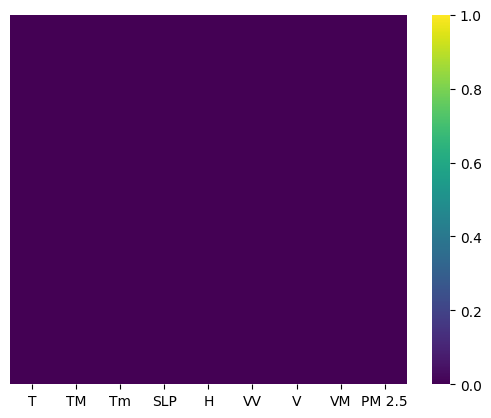

In [10]:
#checking null values using heatmap
sns.heatmap(df.isnull(), yticklabels = False, cbar=True, cmap = 'viridis')

### 3.2 Check Duplicates

In [11]:
df.duplicated().sum()

0

#### There are no duplicates  values in the data set

### 3.3 Check data types

In [12]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1090 entries, 0 to 1089
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   T       1090 non-null   float64
 1   TM      1090 non-null   float64
 2   Tm      1090 non-null   float64
 3   SLP     1090 non-null   float64
 4   H       1090 non-null   float64
 5   VV      1090 non-null   float64
 6   V       1090 non-null   float64
 7   VM      1090 non-null   float64
 8   PM 2.5  1088 non-null   float64
dtypes: float64(9)
memory usage: 76.8 KB


### 3.4 Checking the number of unique values of each column

In [13]:
df.nunique()

T         266
TM        257
Tm        251
SLP       277
H          77
VV         25
V          98
VM         35
PM 2.5    560
dtype: int64

### 3.5 Check statistics of data set

In [14]:
df.describe()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
count,1090.000000,1090.000000,1090.000000,1090.000000,1090.000000,1090.000000,1090.000000,1090.000000,1088.000000
mean,25.678440,32.447248,19.321651,1007.965780,63.370642,2.007982,6.484679,15.667523,108.255729
std,7.230386,6.692962,7.582759,7.550425,15.859468,0.728787,3.889221,7.568278,82.288271
min,6.700000,9.800000,0.000000,990.400000,20.000000,0.300000,0.400000,1.900000,0.000000
25%,19.000000,27.700000,12.025000,1001.225000,54.000000,1.600000,3.500000,11.100000,43.958333
50%,27.900000,34.350000,21.350000,1007.950000,65.000000,1.900000,5.900000,14.800000,83.458333
75%,31.375000,37.000000,26.000000,1014.800000,75.000000,2.600000,8.900000,18.300000,152.686458
max,38.500000,45.500000,34.000000,1023.200000,98.000000,5.800000,24.400000,57.600000,404.500000


### 3.7 Exploring Data

In [15]:
df.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833


In [16]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 9 numerical features : ['T', 'TM', 'Tm', 'SLP', 'H', 'VV', 'V', 'VM', 'PM 2.5']

We have 0 categorical features : []


### 4. Exploring Data ( Visualization )
#### 4.1 Visualize the distribution to make some conclusion. 
- Histogram
- Kernel Distribution Function (KDE)

#### 4.1.1 Histogram & KDE

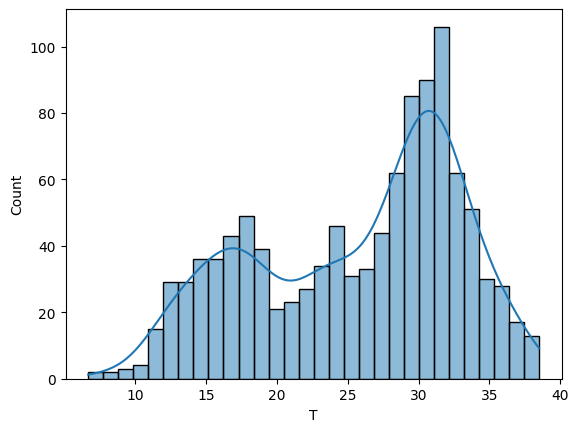

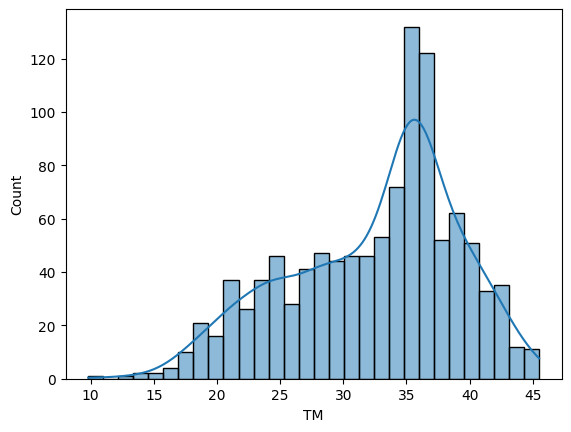

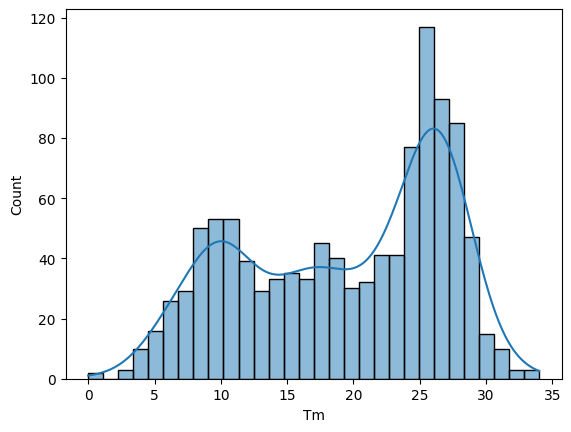

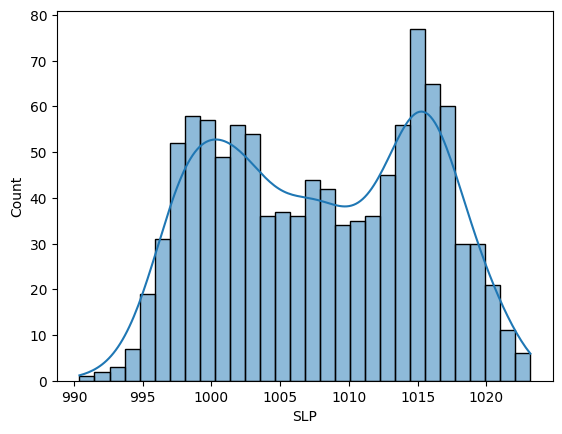

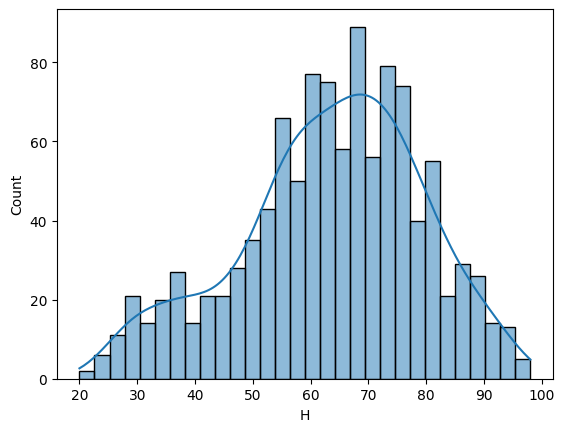

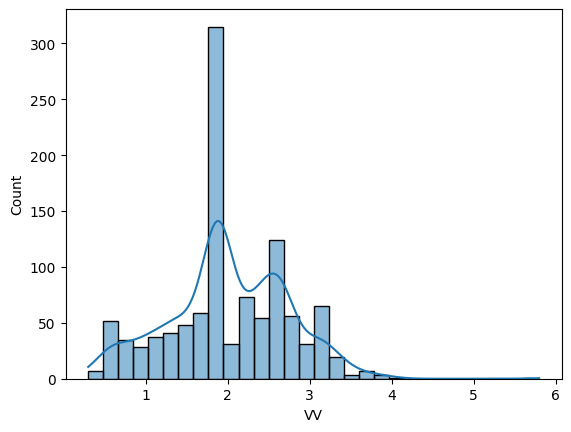

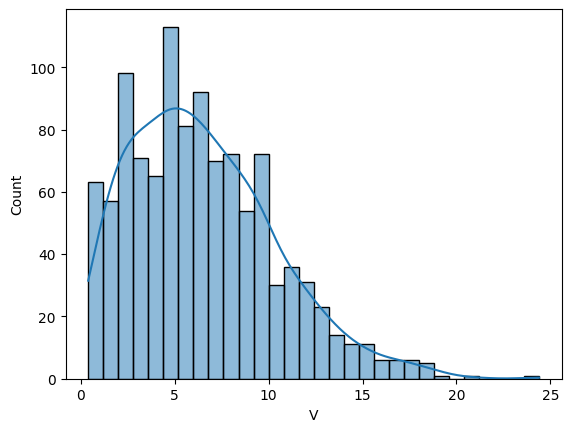

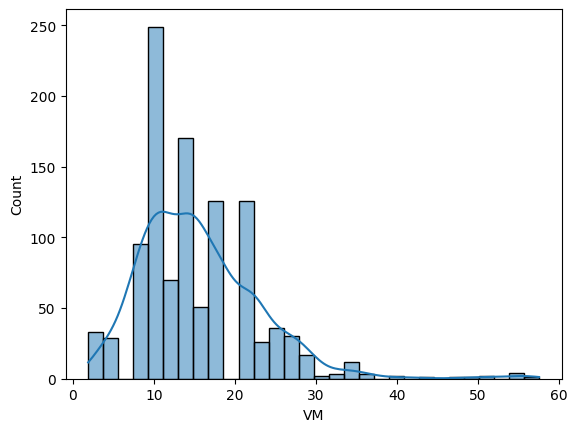

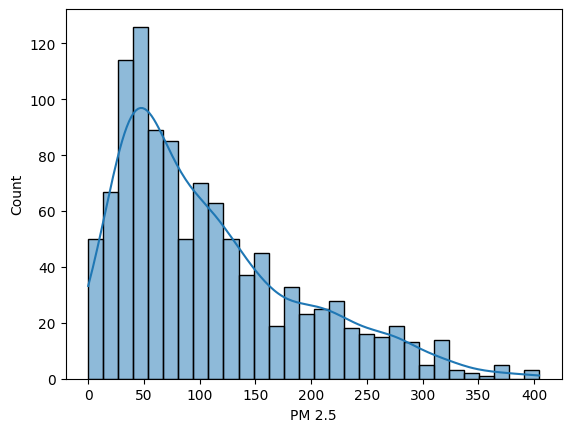

In [17]:
for i in numeric_features:
    plt.figure(i)
    sns.histplot(data=df,x=i,bins=30,kde=True)

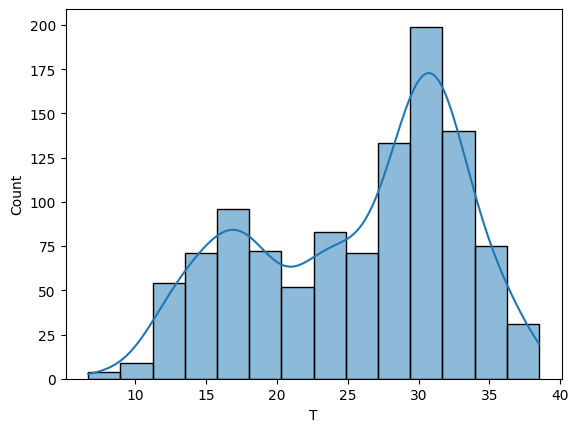

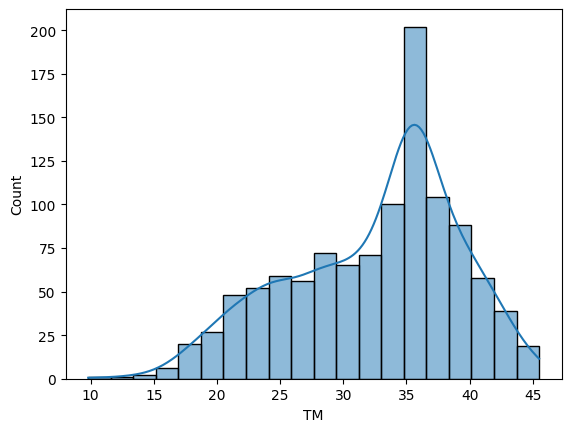

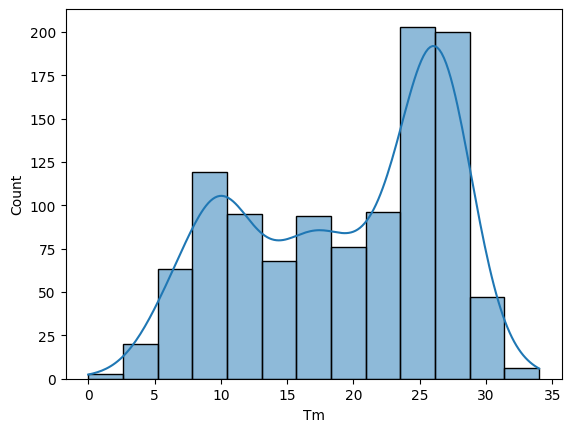

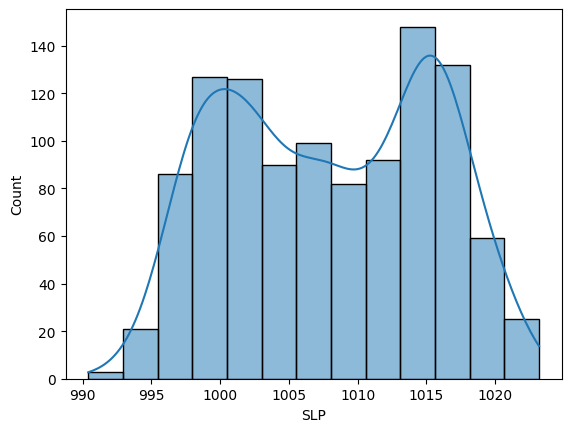

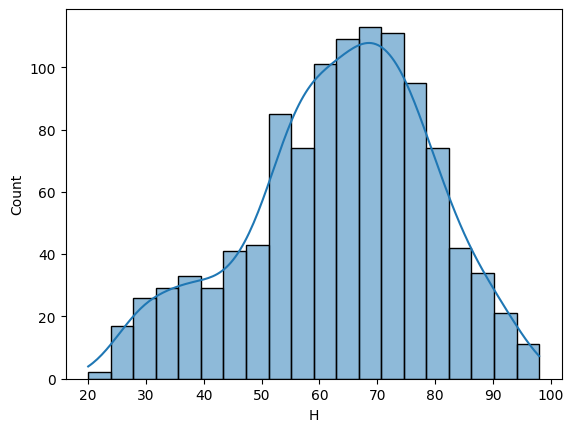

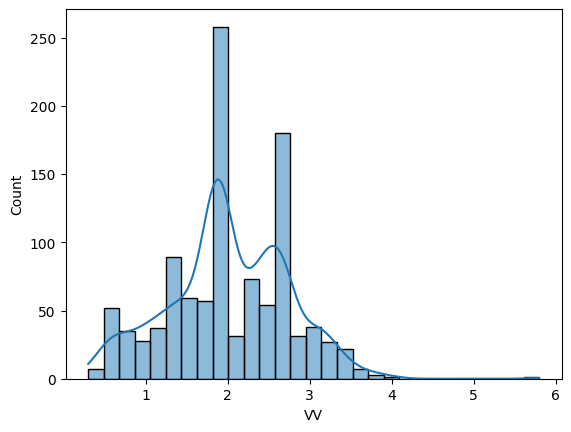

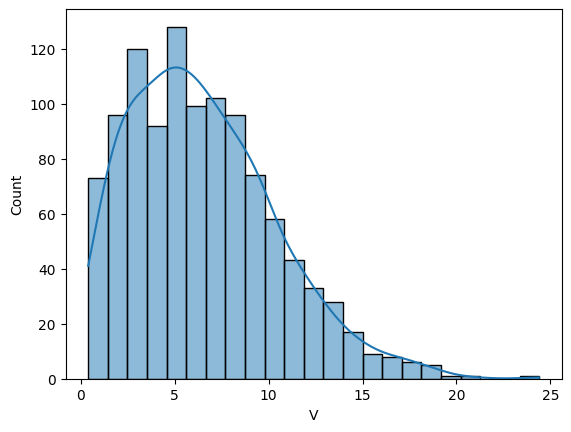

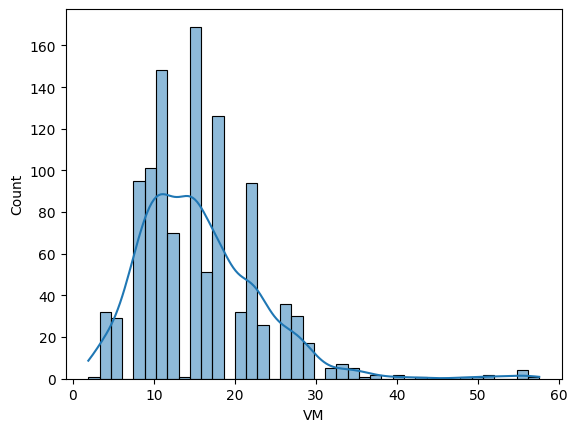

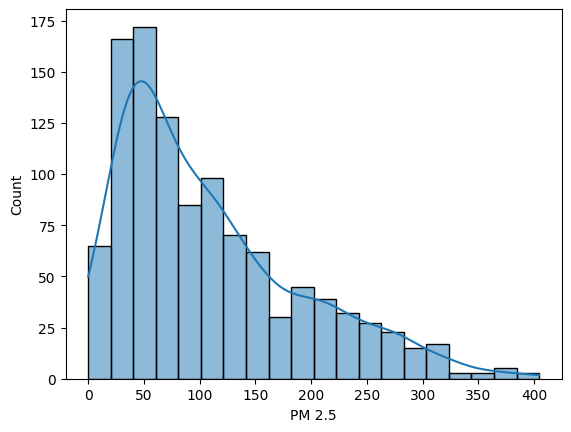

In [18]:
for i in numeric_features:
    plt.figure(i)
    sns.histplot(data=df,x=i,kde=True)

#### 4.4.2 CHECKING OUTLIERS

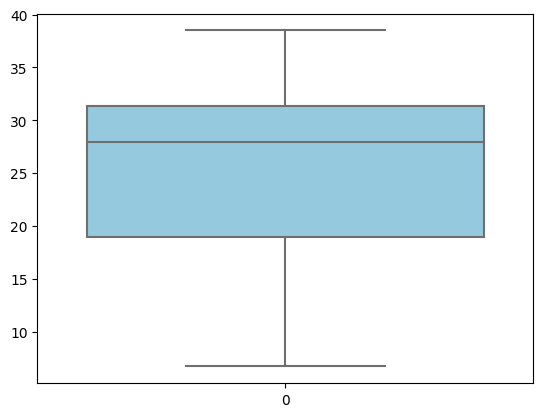

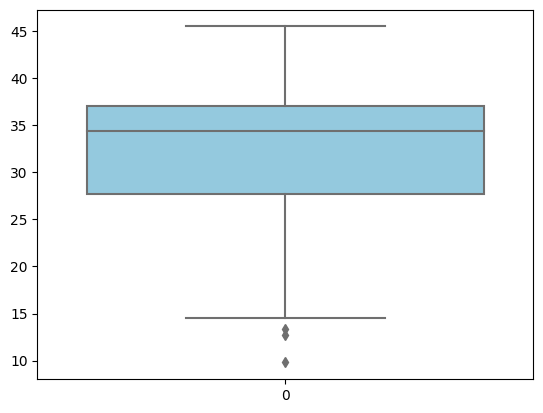

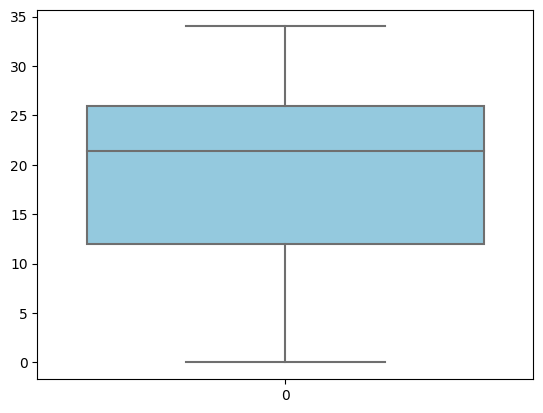

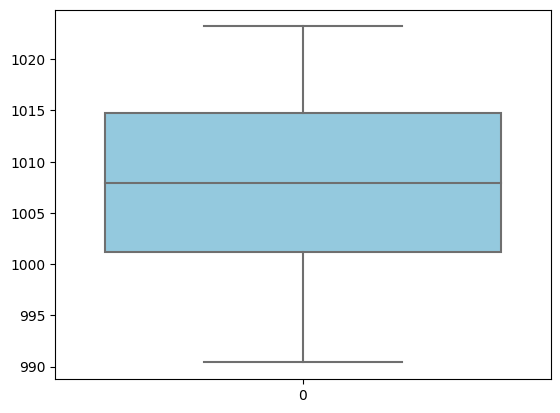

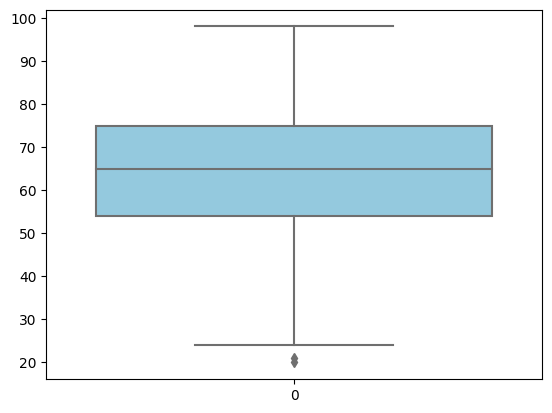

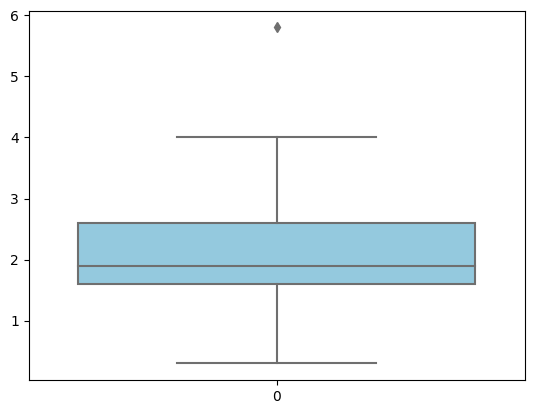

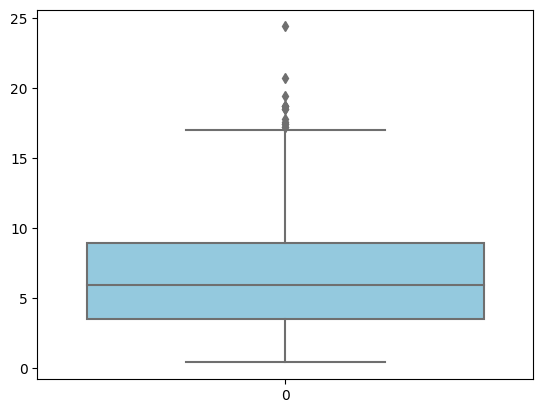

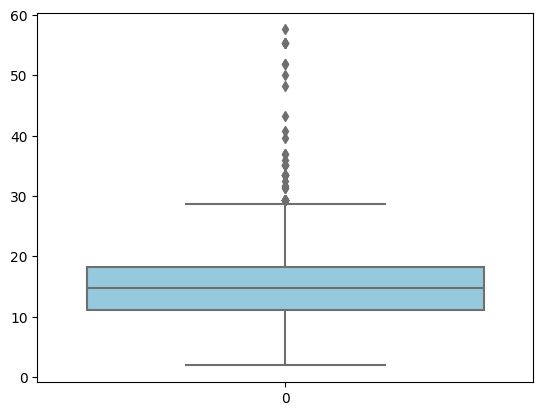

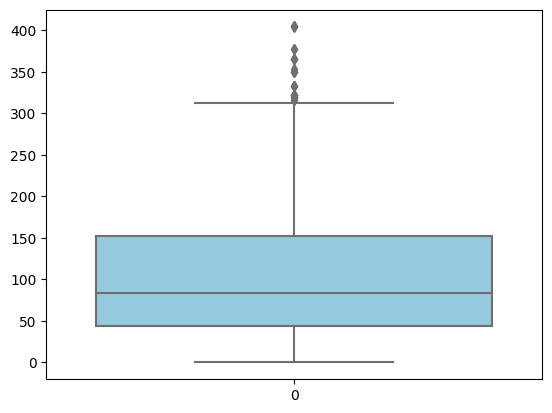

In [19]:
for i in numeric_features:
    plt.figure(i)
    sns.boxplot(df[i],color='skyblue')

#### 4.4.3 MUTIVARIATE ANALYSIS USING PAIRPLOT

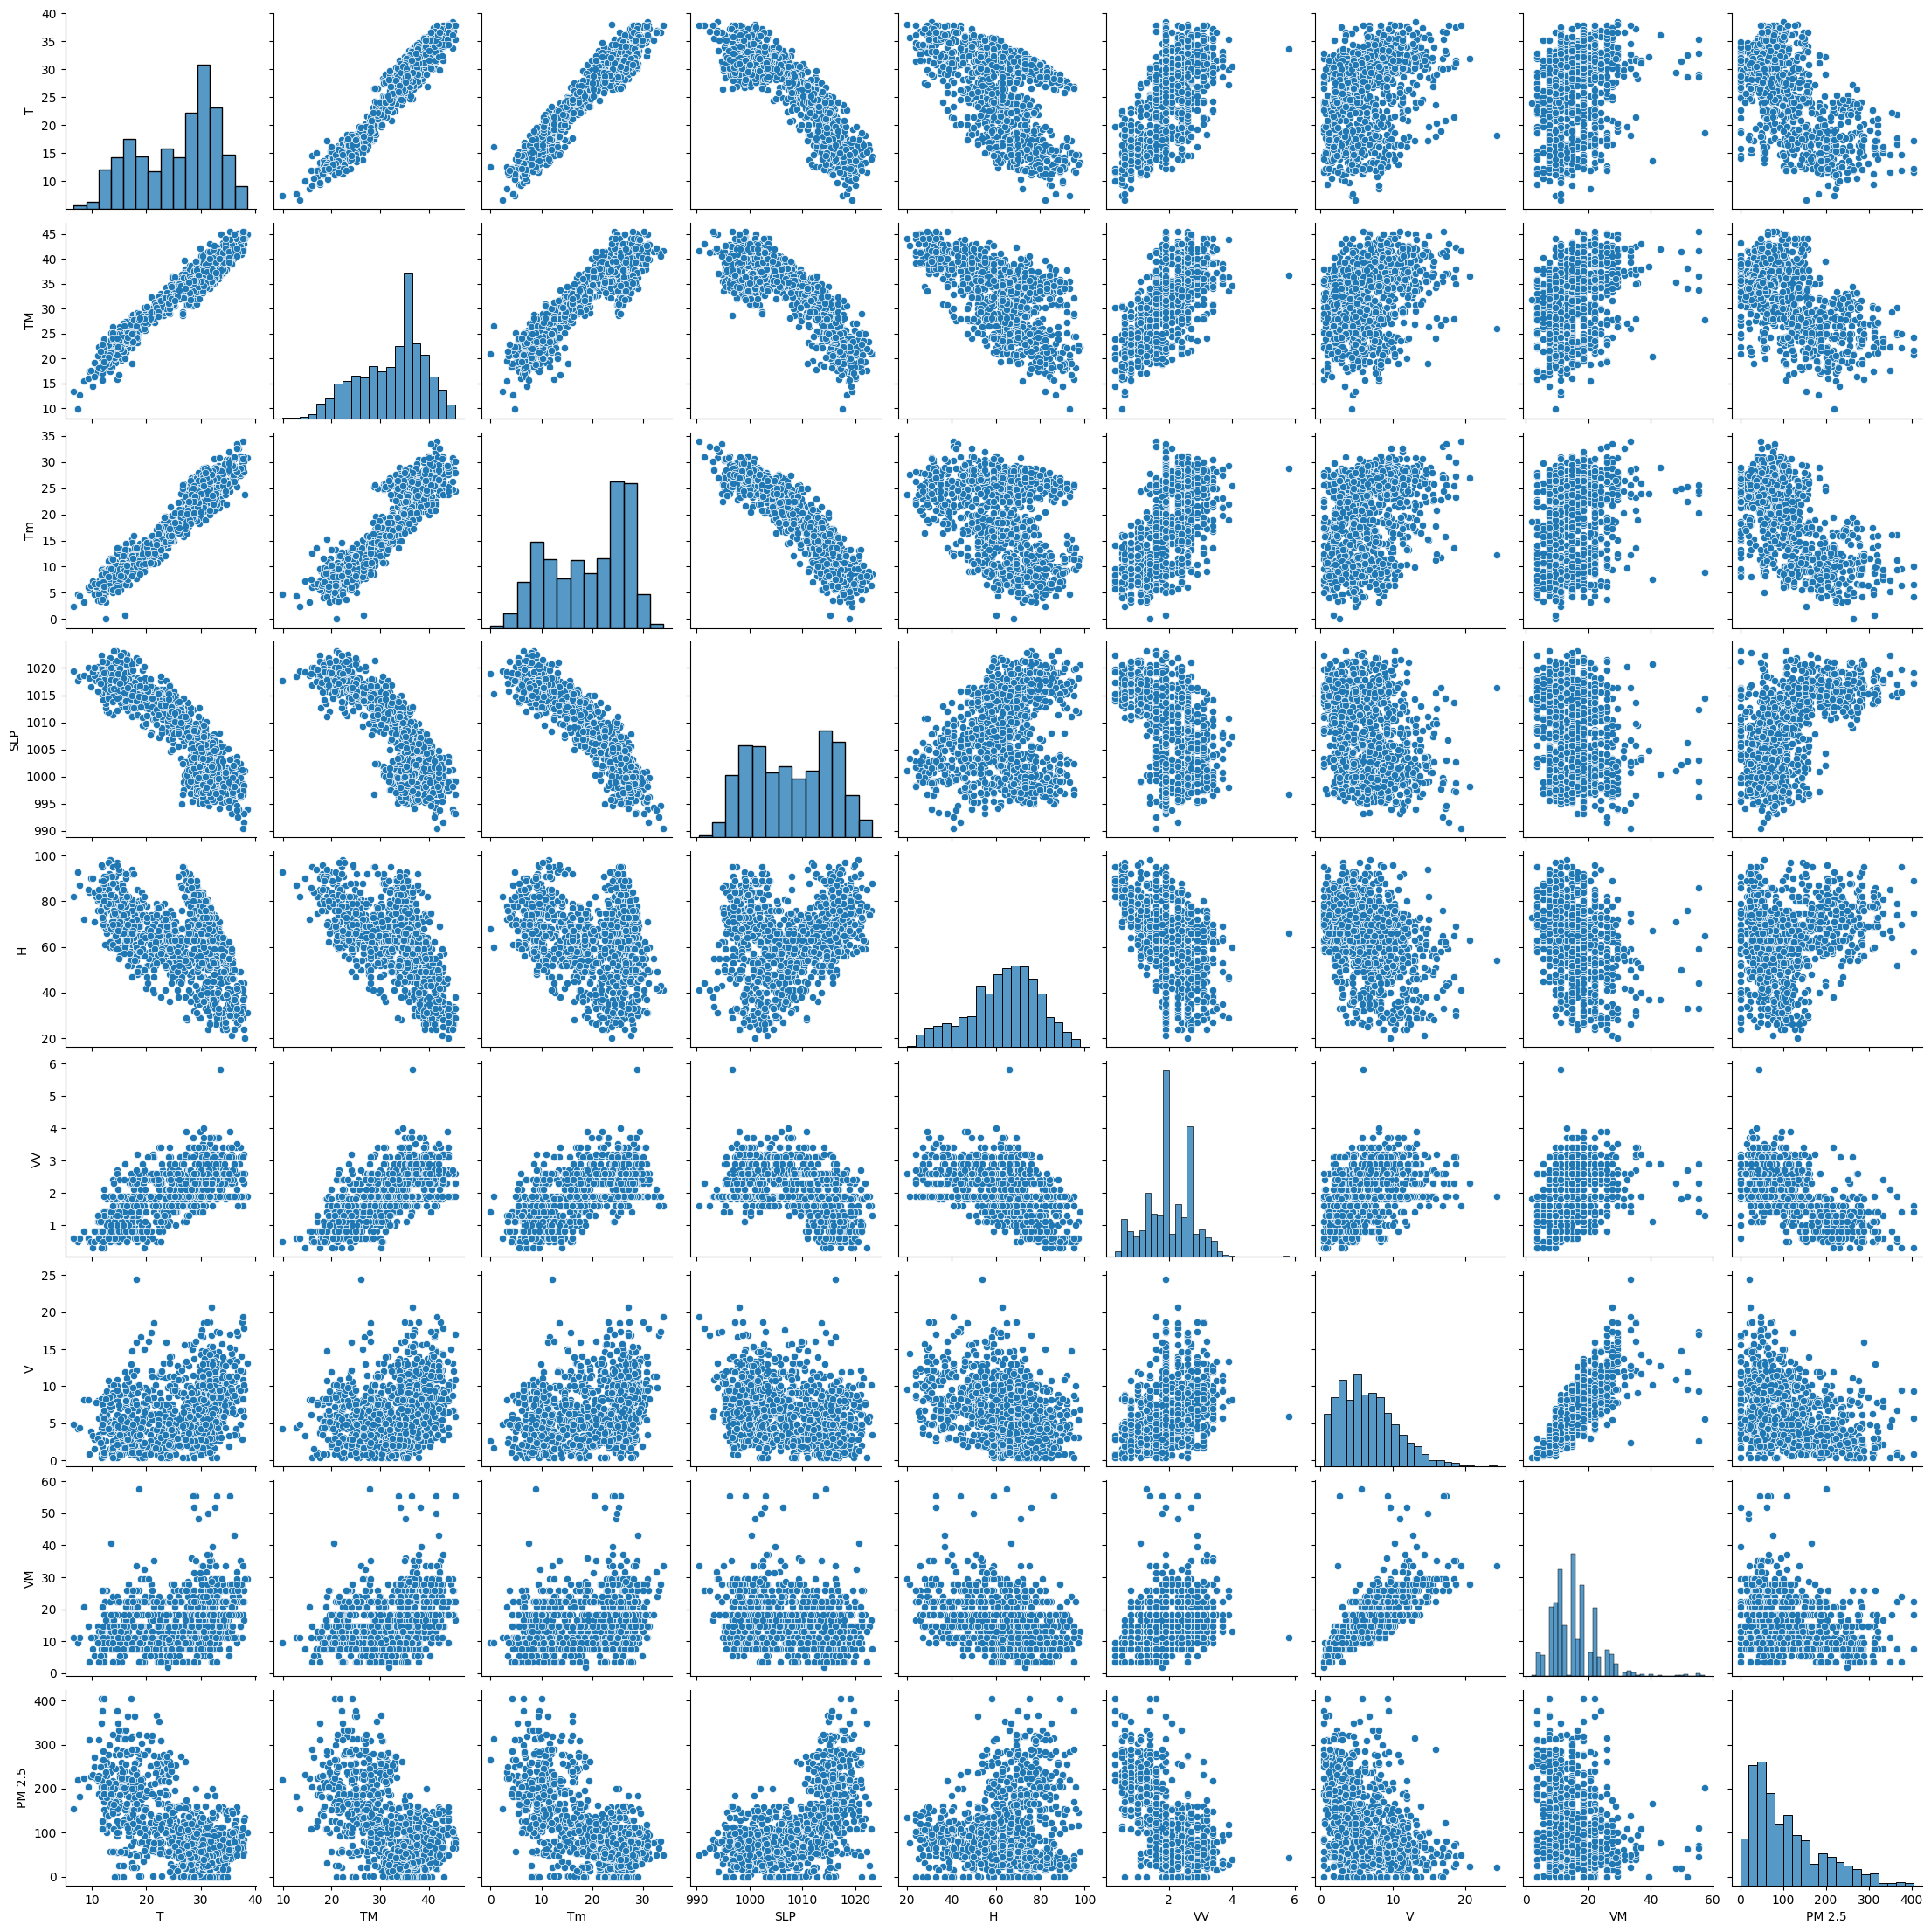

In [20]:
sns.pairplot(df)
plt.show()

### Splitting the data into dependent and independent features

In [21]:
#droping the null values
df = df.dropna()

In [22]:
X = df.iloc[:,:-1] #independent features
y = df.iloc[:,-1] #dependent features

In [23]:
#checking for null values
X.isnull().sum()

T      0
TM     0
Tm     0
SLP    0
H      0
VV     0
V      0
VM     0
dtype: int64

In [24]:
#checking for null values
y.isnull().sum()

0

### Checking the correlation

In [25]:
print(X.shape, y.shape)

(1088, 8) (1088,)


In [26]:
df.corr()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
T,1.000000,0.963416,0.957227,-0.883207,-0.488919,0.625547,0.320218,0.276548,-0.629693
TM,0.963416,1.000000,0.889979,-0.826008,-0.576799,0.598727,0.303218,0.285671,-0.565459
Tm,0.957227,0.889979,1.000000,-0.912333,-0.275047,0.547490,0.312165,0.244408,-0.661733
SLP,-0.883207,-0.826008,-0.912333,1.000000,0.231971,-0.483494,-0.325862,-0.269129,0.605637
H,-0.488919,-0.576799,-0.275047,0.231971,1.000000,-0.489597,-0.356241,-0.368694,0.166577
VV,0.625547,0.598727,0.547490,-0.483494,-0.489597,1.000000,0.369851,0.325963,-0.593327
V,0.320218,0.303218,0.312165,-0.325862,-0.356241,0.369851,1.000000,0.780952,-0.327917
VM,0.276548,0.285671,0.244408,-0.269129,-0.368694,0.325963,0.780952,1.000000,-0.262848
PM 2.5,-0.629693,-0.565459,-0.661733,0.605637,0.166577,-0.593327,-0.327917,-0.262848,1.000000


<Axes: >

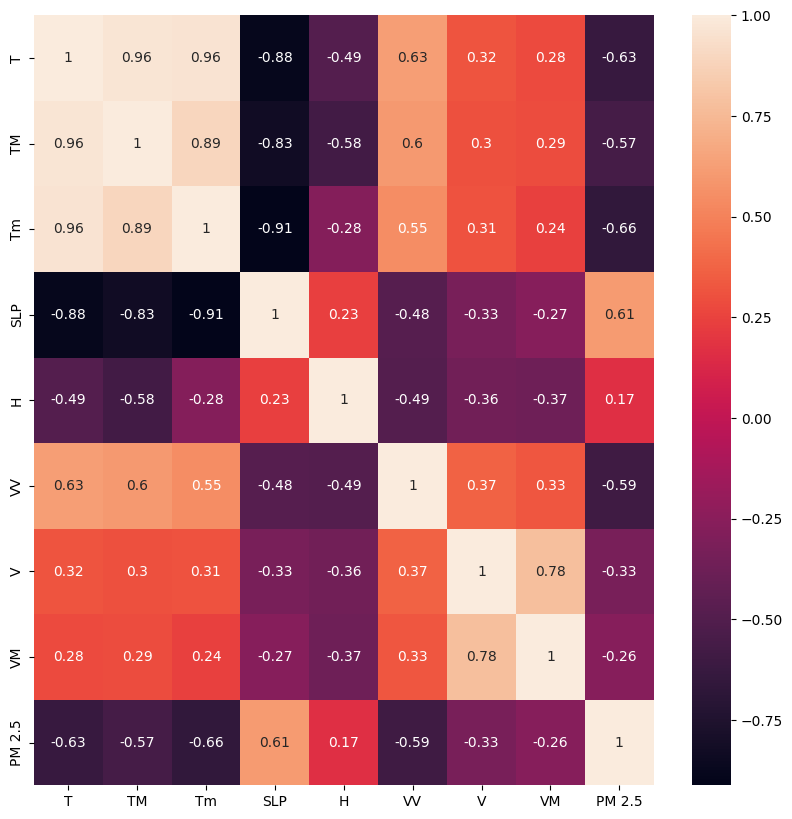

In [27]:
#visualizing the correlation
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

In [28]:
df.corr().index

Index(['T', 'TM', 'Tm', 'SLP', 'H', 'VV', 'V', 'VM', 'PM 2.5'], dtype='object')

### Feature Importance

In [29]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [30]:
X.head()

,T,TM,Tm,SLP,H,VV,V,VM
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2


In [31]:
print(model.feature_importances_)

[0.15605477 0.10470389 0.21311332 0.12925902 0.0794472  0.21137217
 0.05916777 0.04688185]


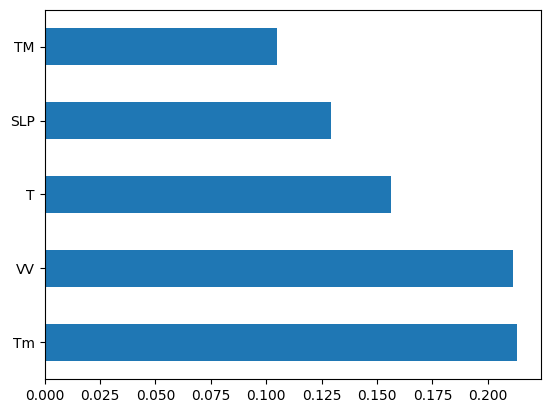

In [32]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

<Axes: xlabel='PM 2.5', ylabel='Density'>

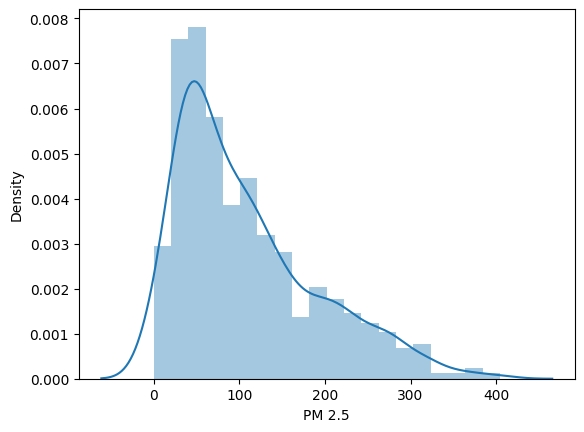

In [33]:
sns.distplot(y)

### Train test split

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=0)

### Linear Regression

In [35]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [36]:
regressor.coef_

array([  0.73586574,   0.49422152,  -5.78546447,   0.53008447,
        -0.7345896 , -43.45735865,  -1.92997688,   0.08983924])

In [37]:
regressor.intercept_

-201.84687008590973

In [38]:
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(X_train, y_train)))

Coefficient of determination R^2 <-- on train set: 0.5558460401426302


In [39]:
print("Coefficient of determination R^2 <-- on test set: {}".format(regressor.score(X_test, y_test)))

Coefficient of determination R^2 <-- on test set: 0.5002132050072754


In [40]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(regressor,X,y,cv=5)

In [41]:
score

array([0.57167602, 0.53819461, 0.49430299, 0.43619185, 0.44066312])

In [42]:
score.mean()

0.4962057187240263

### Model Evaluation

In [43]:
coeff_df = pd.DataFrame(regressor.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
T,0.735866
TM,0.494222
Tm,-5.785464
SLP,0.530084
H,-0.734590
VV,-43.457359
V,-1.929977
VM,0.089839


In [44]:
prediction=regressor.predict(X_test)

<Axes: xlabel='PM 2.5', ylabel='Density'>

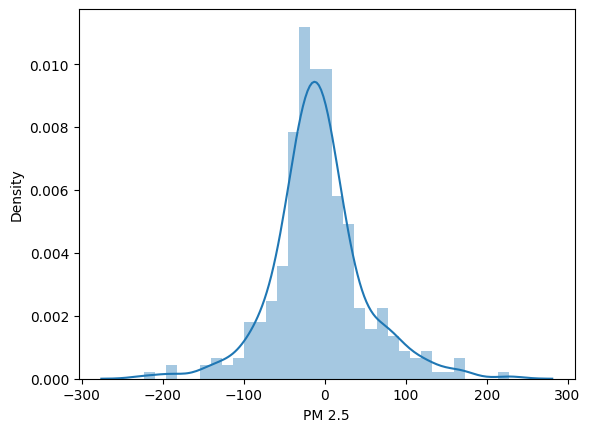

In [45]:
sns.distplot(y_test-prediction)

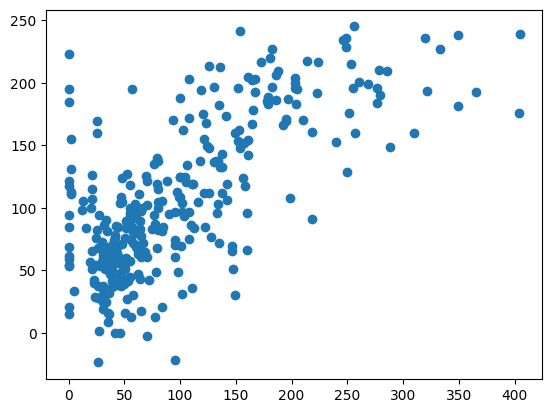

In [46]:
plt.scatter(y_test,prediction)

### Regression Evaluation Metrics

In [47]:
from sklearn import metrics

In [48]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 40.54246531132519
MSE: 3226.0144324691437
RMSE: 56.79801433561867


In [49]:
import pickle 

In [50]:
# open a file, where you ant to store the data
file = open('regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(regressor, file)